# Chapter 6, Example 1b

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
# parameters
no_epochs = 1000

no_labels = 3
no_features = 4
no_exps = 10

hidden_units = [2, 4, 6, 8, 10, 12]

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
def train_exp(X, Y):

    x_train, y_train, x_test, y_test = X[:100], Y[:100], X[100:], Y[100:]
    
    acc = []
    for no_hidden in hidden_units:
        
        model = Sequential([
            Dense(no_hidden, activation='relu'),
            Dense(no_labels, activation='softmax')])
    
        model.compile(optimizer='sgd', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
        history = model.fit(x_train, y_train,
            epochs=no_epochs,
            verbose=0,
            use_multiprocessing=False,
            validation_data=(x_test, y_test))
    
        acc.append(history.history['val_accuracy'][no_epochs-1])
        
    return acc

In [4]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

acc = []
for exp in range(no_exps):
        
    idx = np.arange(no_data)
    np.random.shuffle(idx)

    acc.append(train_exp(X[idx], Y[idx]))
    print('exp %d, acc %s'%(exp, acc[exp]))

mean_acc = np.mean(np.array(acc), axis = 0)
print('accuracy %s'%(mean_acc))

print('* hidden units %d *'%hidden_units[np.argmax(mean_acc)])

exp 0, acc [0.96, 0.98, 0.96, 1.0, 0.96, 0.98]
exp 1, acc [0.96, 0.92, 0.94, 0.96, 0.96, 0.96]
exp 2, acc [0.82, 0.92, 0.94, 0.96, 0.94, 0.96]
exp 3, acc [0.9, 0.96, 0.96, 0.94, 0.96, 0.94]
exp 4, acc [1.0, 1.0, 1.0, 1.0, 0.98, 1.0]
exp 5, acc [0.96, 0.98, 0.98, 0.98, 0.98, 0.98]
exp 6, acc [0.94, 0.98, 0.98, 0.98, 0.98, 0.98]
exp 7, acc [1.0, 1.0, 0.98, 1.0, 1.0, 1.0]
exp 8, acc [0.96, 0.98, 0.98, 0.98, 0.98, 0.98]
exp 9, acc [0.94, 0.96, 0.96, 0.94, 0.94, 0.96]
accuracy [0.94399995 0.96800005 0.96800005 0.974      0.96799994 0.9740001 ]
* hidden units 12 *


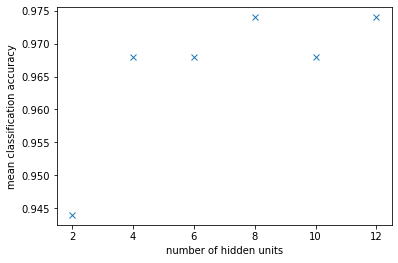

In [5]:
plt.figure(1)
plt.plot(hidden_units, mean_acc, marker = 'x', linestyle = 'None')
plt.xlabel('number of hidden units')
plt.ylabel('mean classification accuracy')
plt.savefig('./figures/6.1b_1.png')